In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

In [ ]:
# Import Packages
import pandas as pd

In [ ]:
# Read contract data
contractDf = pd.read_excel('ContractData.xls')
print(contractDf.shape)
Crelevantfields = ['player_id','first_name','last_name','position','cap_hit','total_salary','signing_date','length','contract_end']
contractDf = contractDf[Crelevantfields]
contractDf.head()

(7656, 27)


,player_id,first_name,last_name,position,cap_hit,total_salary,signing_date,length,contract_end
0,2510,Patrick,Kane,Right Wing,10500000,13800000.0,2014-07-09,8,2022-2023
1,2516,Jonathan,Toews,Center,10500000,13800000.0,2014-07-09,8,2022-2023
2,2039,Anze,Kopitar,Center,10000000,13000000.0,2016-01-16,8,2023-2024
3,1216,Alex,Ovechkin,Left Wing,9538462,10000000.0,2008-01-10,13,2020-2021
4,1777,Evgeni,Malkin,Center,9500000,9500000.0,2013-06-13,8,2021-2022


In [ ]:
# Read performance data
performanceDf = pd.read_excel('./PerformanceData.xlsx')
print(contractDf.shape)
Prelevantfields = ['player_id','season_name','team_id_source','games_played','toi','gf_percentage','xgf_percentage','cf_percentage','g60','p60']
performanceDf = performanceDf[Prelevantfields]
performanceDf.head()

(7656, 9)


,player_id,season_name,team_id_source,games_played,toi,gf_percentage,xgf_percentage,cf_percentage,g60,p60
0,1288,2019-2020,ANA,69,966.983333,44.3,50.7,49.1,0.558438,1.551216
1,1556,2019-2020,ANA,6,53.616667,57.1,44.2,49.0,NaN,2.238110
2,4234,2019-2020,ANA,46,653.250000,46.2,43.1,43.0,0.091848,0.275545
3,3392,2019-2020,ANA,49,751.166667,54.8,46.0,47.4,0.159751,1.038385
4,3037,2019-2020,ANA,71,901.550000,50.0,50.1,51.6,1.197937,1.996561


In [ ]:
# Merge datasets
df = contractDf.merge(performanceDf, on = 'player_id', how = 'left', indicator=True)
print(df.shape)
df.head()

(7961, 19)


,player_id,first_name,last_name,position,cap_hit,total_salary,signing_date,length,contract_end,season_name,team_id_source,games_played,toi,gf_percentage,xgf_percentage,cf_percentage,g60,p60,_merge
0,2510,Patrick,Kane,Right Wing,10500000,13800000.0,2014-07-09,8,2022-2023,2019-2020,CHI,70.0,1139.300000,59.0,46.4,47.4,1.000614,2.685860,both
1,2516,Jonathan,Toews,Center,10500000,13800000.0,2014-07-09,8,2022-2023,2019-2020,CHI,70.0,937.383333,50.5,47.7,49.5,0.704088,2.624327,both
2,2039,Anze,Kopitar,Center,10000000,13000000.0,2016-01-16,8,2023-2024,2019-2020,LAK,70.0,1050.016667,55.6,50.4,52.1,0.685703,1.714259,both
3,1216,Alex,Ovechkin,Left Wing,9538462,10000000.0,2008-01-10,13,2020-2021,2019-2020,WSH,66.0,980.100000,47.5,49.6,51.4,1.652893,2.265075,both
4,1777,Evgeni,Malkin,Center,9500000,9500000.0,2013-06-13,8,2021-2022,2019-2020,PIT,55.0,796.466667,57.0,55.7,53.2,1.205324,3.465305,both


In [ ]:
# Check merge results

print(df['_merge'].value_counts())
training = df.loc[(df['_merge'] == 'both') & (df['position'] != 'Goaltender')]
training['total_contract_value'] = training['cap_hit'] * training['length']


both          4568
left_only     3393
right_only       0
Name: _merge, dtype: int64


<ipython-input-6-27d873b2c70d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training['total_contract_value'] = training['cap_hit'] * training['length']


In [ ]:
# training[[	'games_played',	'toi',	'gf_percentage',	'xgf_percentage',	'g60',	'p60', 'total_contract_value']].to_csv('/content/gdrive/MyDrive/Shared Stuff/Term Project/Data/trainingset.csv')


In [ ]:
#######################
### Begin Modelling ###
#######################

In [ ]:
# Import Packages

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score
from sklearn.preprocessing import StandardScaler

y_value = training['total_contract_value']
#x_values = training[[	'games_played',	'toi',	'gf_percentage',	'xgf_percentage',	'cf_percentage',	'g60',	'p60' ]]
x_values = training[[	'games_played',	'toi',	'gf_percentage',	'xgf_percentage',	'g60',	'p60' ]]
x_values = x_values.fillna(0.0)


x_train, x_test, y_train, y_test = train_test_split(x_values, y_value, test_size=0.33, random_state=42)

linreg_pipeline = Pipeline([
                  ('std', StandardScaler()),            # standardize values
                  ('pca', PCA(n_components=.95)),       # feature engineer with PCA
                  ('lin', LinearRegression())           # apply model - try grid search
                  ])

knn_pipeline = Pipeline([
                  ('std', StandardScaler()),
                  ('pca', PCA(n_components=.95)),
                  ('knn', KNeighborsRegressor(10))
                  ])

dtree_pipeline = Pipeline([
                  ('std', StandardScaler()),
                  ('pca', PCA(n_components=.95)),
                  ('dtree', DecisionTreeRegressor())
                  ])

rforest_pipeline = Pipeline([
                  ('std', StandardScaler()),
                  ('pca', PCA(n_components=.95)),
                  ('rfr', RandomForestRegressor())
                  ])


# Prepare model pipeline
pipelines = [linreg_pipeline, knn_pipeline, dtree_pipeline, rforest_pipeline]
model_names = ['Linear Regression', 'K Nearest Neighbors', 'Decision Tree', 'Random Forest']
count = 0

for p in pipelines:
    
    p.fit(x_train, y_train)
    predictions = p.predict(x_test)

#    print("For "+ name +", precision, recall, and F1 were:")
    print("")
    print(model_names[count])
    print("RMSE:", mean_squared_error(predictions, y_test, squared=False))
    print("R Square:", r2_score(predictions, y_test))
    print("MAE:", mean_absolute_error(predictions, y_test))
    print("")
    count += 1



Linear Regression
RMSE: 19666717.24438892
R Square: -2.7032186086004604
MAE: 14249025.50104147


K Nearest Neighbors
RMSE: 15678213.772292323
R Square: 0.10651513196485896
MAE: 10795430.41041114


Decision Tree
RMSE: 8599903.683089005
R Square: 0.8385050854888472
MAE: 3986767.6938326284


Random Forest
RMSE: 8709404.518271009
R Square: 0.8201521006557597
MAE: 4653623.60890138



1. add Exploratory Data Analysis of predicted values
2. add Plots
3. try new parameters

In [ ]:
# Import Current Season Data Set
RealWorld = pd.read_csv('./skaters.csv')

# Filter for all situations 
RealWorld = RealWorld.loc[ (RealWorld['situation'] == 'all') ]

# Select important fields
RWRelevantFields = ['playerId',	'name',	'games_played',	'icetime',	'OnIce_F_xGoals', 'OnIce_A_xGoals',	'I_F_points',	'I_F_goals',	'OnIce_F_goals',	'OnIce_A_goals']
rwdf = RealWorld[RWRelevantFields]

# Reset index
rwdf = rwdf.reset_index()

# Calculate fields
rwdf['toi'] = rwdf['icetime'] /  60                                                                             # convert seconds to mins
rwdf['g60'] = rwdf['I_F_goals'] / rwdf['icetime'] * 60                                                          # calculate rate stats
rwdf['p60'] = rwdf['I_F_points'] / rwdf['icetime'] * 60                                                         # calculate rate stats
rwdf['gf_percentage'] = (rwdf['OnIce_F_goals'] / ( rwdf['OnIce_F_goals'] + rwdf['OnIce_A_goals'] ) ) * 100      # calculate rate stats
rwdf['xgf_percentage'] = (rwdf['OnIce_F_xGoals'] / ( rwdf['OnIce_F_xGoals'] + rwdf['OnIce_A_xGoals'] ) ) * 100  # calculate rate stats

# Select & Rename fields
rwdf = rwdf[['name', 'games_played','toi','gf_percentage', 'xgf_percentage','g60','p60']]
rwdf.columns = ['name',	'games_played',	'toi',	'gf_percentage',	'xgf_percentage',	'g60',	'p60' ]


In [ ]:
# Explore Model Performance & Predictions of Decision Tree
rwdf = rwdf.fillna(0.0)
rwdf = rwdf[[	 'games_played',	'toi',	'gf_percentage',	'xgf_percentage',	'g60',	'p60' ]]

dtree_pipeline = Pipeline([
                  ('pca', PCA(n_components=6)),
                  ('dtree', DecisionTreeRegressor())
                  ])

dtree_pipeline.fit(x_train, y_train)

predictions = dtree_pipeline.predict(rwdf)
rwdf['predictedcontractvalue'] = predictions
rwdf.to_csv('./DecisionTreeResults.csv')
print(set(predictions))

{24000000.0, 11562500.25, 1684999.3333333333, 23125000.0, 1450000.0, 7557142.857142857, 816666.6666666666, 2308125.75, 1300000.0, 6583333.333333333, 14825000.0, 787500.0, 18750000.0, 2659376.25, 1116666.6666666667, 1971250.0, 3638332.0, 2098749.0, 1778750.0, 1959999.3333333333, 2642499.0, 1966666.6666666667, 753757.0, 700000.0, 1183333.3333333333, 2064999.0, 1105000.0, 2149998.0, 16550000.0, 791666.6666666666, 2682501.0, 1850000.0, 8250000.0, 1451666.6666666667, 2333333.3333333335, 4175000.0, 1065624.75, 1778333.3333333333, 2424999.0, 2026666.0, 916666.6666666666, 1400000.0, 3000000.0, 2209998.0, 2119375.75, 1250000.0, 1612500.0, 1675000.0, 2018041.0, 2315001.0, 27516666.666666668, 2079999.0, 800000.0, 35999999.0, 3487500.0, 2249998.5, 650000.0, 2431249.5, 2612500.0, 1133333.3333333333, 1193750.0, 2377500.0, 10100001.0, 2184999.0, 2227499.25, 2227500.0, 1558333.3333333333, 2247999.6, 2162500.0, 2066249.0, 1891666.6666666667, 25500000.0, 3100000.0, 1500000.0, 1663333.3333333333, 2224999

In [ ]:
# Explore Model Performance & Predictions of Random Forest
rwdf = rwdf.fillna(0.0)
rwdf = rwdf[[	 'games_played',	'toi',	'gf_percentage',	'xgf_percentage',	'g60',	'p60' ]]

rforest_pipeline = Pipeline([
                  ('pca', PCA(n_components=6)),
                  ('rfr', RandomForestRegressor())
                  ])

rforest_pipeline.fit(x_train, y_train)

rf_predictions = rforest_pipeline.predict(rwdf)
rwdf['predictedcontractvalue'] = predictions
rwdf.to_csv('./RandomForestResults.csv')
print(set(predictions))

{24000000.0, 11562500.25, 1684999.3333333333, 23125000.0, 1450000.0, 7557142.857142857, 816666.6666666666, 2308125.75, 1300000.0, 6583333.333333333, 14825000.0, 787500.0, 18750000.0, 2659376.25, 1116666.6666666667, 1971250.0, 3638332.0, 2098749.0, 1778750.0, 1959999.3333333333, 2642499.0, 1966666.6666666667, 753757.0, 700000.0, 1183333.3333333333, 2064999.0, 1105000.0, 2149998.0, 16550000.0, 791666.6666666666, 2682501.0, 1850000.0, 8250000.0, 1451666.6666666667, 2333333.3333333335, 4175000.0, 1065624.75, 1778333.3333333333, 2424999.0, 2026666.0, 916666.6666666666, 1400000.0, 3000000.0, 2209998.0, 2119375.75, 1250000.0, 1612500.0, 1675000.0, 2018041.0, 2315001.0, 27516666.666666668, 2079999.0, 800000.0, 35999999.0, 3487500.0, 2249998.5, 650000.0, 2431249.5, 2612500.0, 1133333.3333333333, 1193750.0, 2377500.0, 10100001.0, 2184999.0, 2227499.25, 2227500.0, 1558333.3333333333, 2247999.6, 2162500.0, 2066249.0, 1891666.6666666667, 25500000.0, 3100000.0, 1500000.0, 1663333.3333333333, 2224999

In [ ]:
# Explore Model Performance & Predictions of Linear Regression
rwdf = rwdf.fillna(0.0)
rwdf = rwdf[[	 'games_played',	'toi',	'gf_percentage',	'xgf_percentage',	'g60',	'p60' ]]

linreg_pipeline = Pipeline([
                  ('pca', PCA(n_components=6)),
                  ('lin', LinearRegression())
                  ])

linreg_pipeline.fit(x_train, y_train)
predictions = linreg_pipeline.predict(rwdf)
rwdf['predictedcontractvalue'] = predictions
rwdf.to_csv('./LinearRegressionResults.csv')

Exploratory Analysis

In [ ]:
y_pred_rf = rforest_pipeline.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt

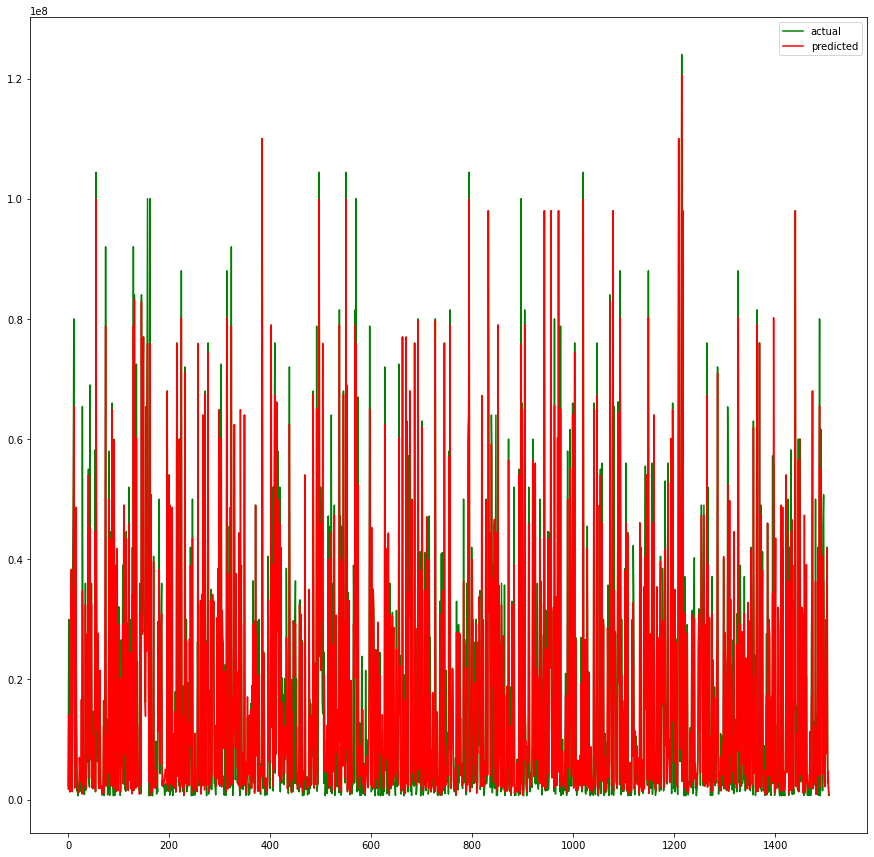

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(range(len(y_test)),y_test,color='green', label='actual')
plt.scatter(range(len(y_test)),y_pred_rf,color='red', label='predicted')
plt.legend()
plt.show()

In [ ]:
d = {
    
    'predicted':y_pred_rf
}

In [ ]:
df = pd.DataFrame(d)
df.head()

,predicted
0,1.761009e+06
1,1.402314e+07
2,4.147145e+06
3,1.264875e+06
4,3.567118e+06


<Figure size 1080x1080 with 0 Axes>

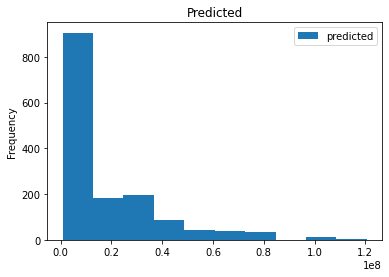

In [ ]:
plt.figure(figsize=(15,15))
df.plot.hist()
plt.title("Predicted")
plt.show()